# Homework 6 - Data Splitting, Decision Trees and Random Forests
This homework will reinforce what you learned about the above classification algorithms by applying them to the pulsar dataset.

You shold have downloaded:
- pulsar.csv

## 0 Load Data
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.

 You can read more (interesting!) details at ([source](https://archive.ics.uci.edu/ml/datasets/HTRU2)).

`pulsar.csv`  contains statistics from two types of signal from pulsar candidates:
1. integrated profile (IP) and
2. dispersion-measure signal-to-noise ratio (DMSNR) curve.

Run the cell below to see what data we have.

In [1]:
# ---------- DO NOT CHANGE CODE HERE ---------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("pulsar.csv")
display(data)
X = data.iloc[:,:8].to_numpy()
y = data.iloc[:,8].to_numpy()
# --------------------------------------------

,IP_Mean,IP_SD,IP_Kurt,IP_Skew,DMSNR_Mean,DMSNR_SD,DMSNR_Kurt,DMSNR_Skew,Pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## 1 Data Splitting (3 ways)
There are many ways to split the training and test data. Here is a short exercise to learn and compare 3 such ways using `sklearn.model_selection`:
1. `train_test_split`
2. `KFold`
3. `StratifiedShuffleSplit`

**Read and understand** how the 3 methods work by reading the code demostration below.
- You should know what every line of code is doing.

#### Method 1: train_test_split
Using `sklearn.model_selection.train_test_split`, we split the data into training and test.

In [3]:
# ---------- DO NOT CHANGE CODE HERE ---------
from sklearn.model_selection import train_test_split
X_train_tts, X_test_tts, y_train_tts, y_test_tts = train_test_split(X, y, test_size=1/3, shuffle=False)

n_pulsar_train_tts = (y_train_tts==1).sum()
n_pulsar_test_tts = (y_test_tts==1).sum()
print("Training Set, Pulsars:", n_pulsar_train_tts, "out of", y_train_tts.shape[0])
print("Test Set    , Pulsars:", n_pulsar_test_tts, "out of", y_test_tts.shape[0])
# --------------------------------------------

Training Set, Pulsars: 1481 out of 11932
Test Set    , Pulsars: 158 out of 5966


#### Method 2: K-Fold
Using `sklearn.model_selection.KFold` on default shuffle settings, we split the data into training and test.

In [4]:
# ---------- DO NOT CHANGE CODE HERE ---------
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

for i, (train_idx_kf, test_idx_kf) in enumerate(kf.split(X)):
    X_train_kf, y_train_kf = X[train_idx_kf], y[train_idx_kf]
    X_test_kf, y_test_kf = X[test_idx_kf], y[test_idx_kf]

    n_pulsar_train_kf = (y_train_kf==1).sum()
    n_pulsar_test_kf = (y_test_kf==1).sum()
    print("Training Set, Pulsars:", n_pulsar_train_kf, "out of", y_train_kf.shape[0])
    print("Test Set    , Pulsars:", n_pulsar_test_kf, "out of", y_test_kf.shape[0], '\n')
# --------------------------------------------

Training Set, Pulsars: 729 out of 11932
Test Set    , Pulsars: 910 out of 5966 

Training Set, Pulsars: 1068 out of 11932
Test Set    , Pulsars: 571 out of 5966 

Training Set, Pulsars: 1481 out of 11932
Test Set    , Pulsars: 158 out of 5966 



#### Method 3: Stratified Shuffle Split
Using `sklearn.model_selection.StratifiedShuffleSplit`, we split the data into training and test.

In [5]:
# ---------- DO NOT CHANGE CODE HERE ---------
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=3, test_size=1/3, random_state=0)

X_train_sss, y_train_sss, X_test_sss, y_test_sss = {}, {}, {}, {}
for i, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    X_train_sss[i], y_train_sss[i] = X[train_idx], y[train_idx]
    X_test_sss[i], y_test_sss[i] = X[test_idx], y[test_idx]

    n_pulsar_train = (y_train_sss[i]==1).sum()
    n_pulsar_test = (y_test_sss[i]==1).sum()
    print("Training Set, Pulsars:", n_pulsar_train, "out of", y_train_sss[i].shape[0])
    print("Test Set    , Pulsars:", n_pulsar_test, "out of", y_test_sss[i].shape[0], '\n')
# --------------------------------------------

Training Set, Pulsars: 1093 out of 11932
Test Set    , Pulsars: 546 out of 5966 

Training Set, Pulsars: 1093 out of 11932
Test Set    , Pulsars: 546 out of 5966 

Training Set, Pulsars: 1093 out of 11932
Test Set    , Pulsars: 546 out of 5966 



### 1.1 Discussion (Stratified Shuffle Split)
The number of pulsars in the training and test data for stratified shuffle split are identical.

**Task:**
1. [1 pt] Why are the number of pulsars identical for each stratified shuffle split? (i.e., what does "stratified" mean?)

    **Ans:** This is because of what stratified means, which is a way to divide up the data sets based on a feature to keep them all consistent across splits while shuffling them. In this case, the feature is split evenly across all the splits for both train and test based on whether or not they were pulsar or not. This may be done to reflect the original dataset distribution among each split.

2. [1 pt] Using the code cell below, verify that the splits themselves are actually not identical. (Tip: use np.all(...), where ... is code you fill in yourself.)

3. [1 pt] Why is the number of pulsars for stratified shuffle split different from those of train_test_split and KFold? A short answer will do.
        
    **Ans:** Stratified shuffle split ensures the ratio of pulsars are evently distributed. In contrast, train_test_split and KFold do not hold this guarantee without specific stratification instructions, so they will be different (not perfectly balanced).








In [6]:
# TOD Use this cell to verify that all the splits from stratified shuffle split are different
are_train_splits_different = not np.all([np.array_equal(X_train_sss[i], X_train_sss[j]) for i in range(len(X_train_sss)) for j in range(i+1, len(X_train_sss))])
are_test_splits_different = not np.all([np.array_equal(X_test_sss[i], X_test_sss[j]) for i in range(len(X_test_sss)) for j in range(i+1, len(X_test_sss))])

print(f"Are training splits different? {are_train_splits_different}")
print(f"Are test splits different? {are_test_splits_different}")

Are training splits different? True
Are test splits different? True


### 1.2 Discussion (train_test_split and KFold)
There is an identical match between the split for train_test_split and one of the splits for KFold.

**Task:**
1. [1 pt] Using the code cell below, verify that the split is indeed identical. (Tip: use np.all(...), where ... is code you fill in yourself.)

2. [1 pt] Why does this identical match happen?  What settings or function/method arguments explain the occurence of this match?

    **Ans:** This is because we explicitly turned off shuffling for train_test_split, and by default KFold has shuffling disabled. Because the two methods will both have a 2 - 1 data split, 2/3 training and 1/3 testing, and the data is not being shuffled in either one of them so the splits are being done on the original order, then the resulting split in one of the three will be the same.


In [9]:
# TOD Use this cell to verify that one of the splits from train_test_split and KFold are the same

is_identical_split_train = not np.all([np.array_equal(X_train_tts, X_train_kf[i]) for i in range(len(X_train_kf))])
print(f"Is the train split identical? {is_identical_split_train}")
is_identical_split_test = not np.all([np.array_equal(X_test_tts, X_test_kf[i]) for i in range(len(X_test_kf))])
print(f"Is the test split identical? {is_identical_split_test}")

Is the train split identical? True
Is the test split identical? True
Is the first split identical? True


## 2 Cross Validation

### 2.1 sklearn cross val score
**Task:**
1. [2 pt] Use `sklearn.model_selection.cross_val_score` to perform cross validation on decision tree classifier
    - Define your DecisionTreeClassifier as `clf`.
    - Set `max_depth=9` and `random_state=0` in your DecisionTreeClassifier object.
    - Perform a 3-fold validation in `cross_val_score`.
    - Print the cross validation scores, this should be an array of three elements.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# TOD
clf = DecisionTreeClassifier(max_depth=9, random_state=0)

scores = cross_val_score(clf, X, y, cv=3)

print("Cross-validation scores:", scores)

Cross-validation scores: [0.97536038 0.97234328 0.97385183]


### 2.2 "Manual" cross val score
**Task:**

Run the code cell below.

Based on the lecture Jupyter notebooks, the code below *should be* what the `cross_val_score` function performs. If it is what `cross_val_score` function is actually performing, we ought to see the same three validation scores printed.

1. [1 pt] Read the documentation for [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Pay attention to the description in the "cv" parameter. Why isn't the code below performing as we expected?

    **Ans:** When the cv argument is specified in cross_val_score, by default it uses stratified cross-validation by default. KFold doesn't use stratified cross-validation by default, and instead is splitting based on index in the original order (not even shuffling) so this descrepancy in splitting methods yields different results.

2. [1 pt] Based on what you found was wrong with the code below, make a change to the splitting method (it may not be onethat we have previously discussed before, so read the documentation carefully) and print out the new cross validation scores. Make sure they match the previous cell. You should not need to change anything in the for-loop, just the code before it.

In [12]:
k_fold = KFold(n_splits=3, shuffle=False)

from sklearn.model_selection import StratifiedKFold
k_fold = StratifiedKFold(n_splits=3, shuffle=False)

# ---------- DO NOT CHANGE CODE HERE ---------
for k, (train, test) in enumerate(k_fold.split(X,y)):
    clf.fit(X[train],y[train])
    ypred = clf.predict(X[test])
    print ( clf.score(X[test],y[test]) )
# --------------------------------------------


0.9753603754609453
0.9723432785786121
0.9738518270197788


For Problems 3 and 4, we will use the following stratified shuffle split. Make sure you run the next cell to obtain the correct `X_train`, `y_train`, `X_test`, `y_test`.

> Add blockquote



In [13]:
# RUN THIS CELL!

# ---------- DO NOT CHANGE CODE HERE ---------
sss = StratifiedShuffleSplit(n_splits=1, test_size=1/3, random_state=0)
for train_idx, test_idx in sss.split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
# --------------------------------------------

## 3 Decision Tree

### 3.1 Train
**Task:**

[5 pt] Fit decision tree classifiers with different depths to the training data using `sklearn.tree.DecisionTreeClassifier`.
- In the decision tree classifier, fix `random_state=0`.
- Store the accuracy of the prediction on training and test data in the arrays `train_acc_dt` and `test_acc_dt` respectively.
- Let `max_depth` vary from 1, 3, 5, ..., 19, 21. To do this, define array `depths` accordingly and run a for-loop over it.

In [18]:
from sklearn.metrics import accuracy_score

# TOD
depths = range(1, 22, 2)

train_acc_dt = []
test_acc_dt = []

for i, depth in enumerate(depths):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_acc_dt.append(train_acc)
    test_acc_dt.append(test_acc)

    print(f"Depth: {depth}, Training Accuracy: {train_acc}, Test Accuracy: {test_acc}")


Depth: 1, Training Accuracy: 0.9774555816292323, Test Accuracy: 0.9783774723432785
Depth: 3, Training Accuracy: 0.9785450888367415, Test Accuracy: 0.9775393898759638
Depth: 5, Training Accuracy: 0.9829869259135099, Test Accuracy: 0.9778746228628897
Depth: 7, Training Accuracy: 0.9862554475360376, Test Accuracy: 0.9761984579282601
Depth: 9, Training Accuracy: 0.9893563526651022, Test Accuracy: 0.9753603754609453
Depth: 11, Training Accuracy: 0.9927086825343614, Test Accuracy: 0.9738518270197788
Depth: 13, Training Accuracy: 0.9945524639624539, Test Accuracy: 0.9730137445524639
Depth: 15, Training Accuracy: 0.9963962453905464, Test Accuracy: 0.9710023466309085
Depth: 17, Training Accuracy: 0.9978209855849816, Test Accuracy: 0.9694937981897419
Depth: 19, Training Accuracy: 0.9986590680522963, Test Accuracy: 0.968655715722427
Depth: 21, Training Accuracy: 0.9992457257794167, Test Accuracy: 0.9673147837747235


### 3.2 Plot
**Task:**

[1 pt] Plot accuracy (test and training as seperate curves) against depth. Run the following cell.

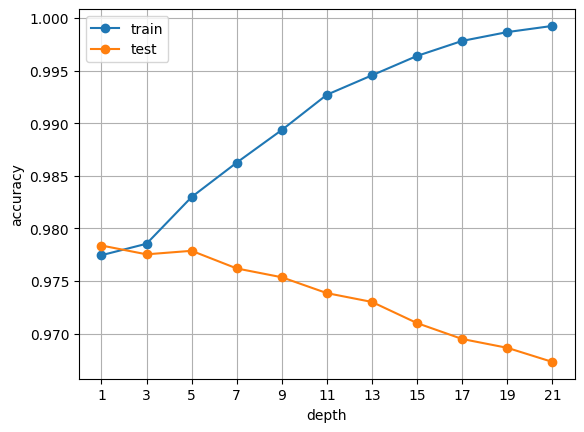

In [19]:
plt.plot(depths, train_acc_dt, 'o-', label='train')
plt.plot(depths, test_acc_dt, 'o-', label='test')
plt.xticks(depths); plt.xlabel('depth'); plt.ylabel('accuracy')
plt.legend(); plt.grid(); plt.show()

### 3.3 Discussion
[2pts] What trends do you observe in the training and test accuracies as depth increases? Explain these trends.

**Ans:** This is a classic case of overfitting. As the depth of the tree increases, the training accuracy improves because greater depth means the tree can be more complex due to having more decision nodes and can capture more nuances within the training data it is given. However, although training accuracy continues to improve, test accuracy falls at greater depths as the depth keeps increasing. This is because the tree became too complex and began fitting to the noise of the training data instead of general patterns, thus resulting in the decrease in test accuracy. This phenomenon is overfitting, a too complex model overfit to the training data so it's performance suffers on test data

## 4 Random Forest
### 4.1 Train
**Task:**

[5 pt] Fit random forest classifiers to the training data using `sklearn.ensemble.RandomForestClassifier`.
- In the random forest classifier, fix `max_depth=3` and `random_state=0`.
- Store the accuracy of the prediction on training and test data in the arrays `train_acc_rf` and `test_acc_rf` respectively.
- Let `n_estimators` vary from 1, 11, 21, ..., 91, 101. To do this, define array `n_ests` accordingly and run a loop over it.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# TOD
n_ests = range(1, 102, 10)

train_acc_rf = []
test_acc_rf = []

for n_est in n_ests:
    rf_clf = RandomForestClassifier(n_estimators=n_est, max_depth=3, random_state=0)

    rf_clf.fit(X_train, y_train)

    y_train_pred = rf_clf.predict(X_train)
    y_test_pred = rf_clf.predict(X_test)

    train_acc_rf.append(accuracy_score(y_train, y_train_pred))
    test_acc_rf.append(accuracy_score(y_test, y_test_pred))

    print(f"n_estimators: {n_est}, Training Accuracy: {train_acc_rf[-1]}, Test Accuracy: {test_acc_rf[-1]}")


n_estimators: 1, Training Accuracy: 0.9748575259805565, Test Accuracy: 0.9751927589674824
n_estimators: 11, Training Accuracy: 0.9772879651357693, Test Accuracy: 0.9755279919544083
n_estimators: 21, Training Accuracy: 0.9783774723432785, Test Accuracy: 0.976533690915186
n_estimators: 31, Training Accuracy: 0.97846128059001, Test Accuracy: 0.977036540395575
n_estimators: 41, Training Accuracy: 0.978964130070399, Test Accuracy: 0.9777070063694268
n_estimators: 51, Training Accuracy: 0.9787127053302045, Test Accuracy: 0.9775393898759638
n_estimators: 61, Training Accuracy: 0.978964130070399, Test Accuracy: 0.9777070063694268
n_estimators: 71, Training Accuracy: 0.9792993630573248, Test Accuracy: 0.9777070063694268
n_estimators: 81, Training Accuracy: 0.9791317465638619, Test Accuracy: 0.9778746228628897
n_estimators: 91, Training Accuracy: 0.978964130070399, Test Accuracy: 0.9778746228628897
n_estimators: 101, Training Accuracy: 0.9790479383171304, Test Accuracy: 0.9777070063694268


### 4.2 Plot
[1 pt] Plot accuracy (test and training as seperate curves) against number of estimators. Run the following cell.

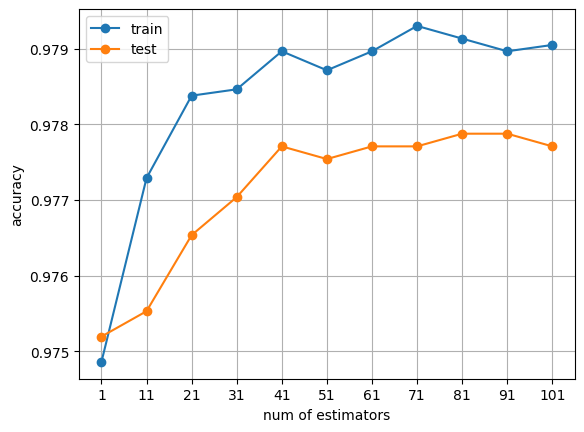

In [23]:
plt.plot(n_ests, train_acc_rf, 'o-', label='train')
plt.plot(n_ests, test_acc_rf, 'o-', label='test')
plt.xticks(n_ests); plt.xlabel('num of estimators'); plt.ylabel('accuracy');
plt.legend(); plt.grid(); plt.show()

### 4.3 Discussion
[1 pt] What trends do you observe in the training and test accuracies as `n_estimators` increases? Briefly explain why these trends occured. You are not expected to give an overly detailed response because the exact mechanism of random forest was not covered extensively in lecture.

**Ans:** As the num estimators increases, it seems like the train and test accuracy improved. It improved greatly early on, and then seems to relatively stabilize around 41 estimators and goes up and down, possibly showing diminishing returns past this point. This is likely because early on, any additional num estimators greatly increases the model's abilities to capture patterns in the training data and this translated to the test data as well. The test accuracy didn't sharply decline like the decision tree model before did because it is the average result of many trees, although each tree may have some variance having a large n leads to better majority voting schemes, so overfitting doesn't happen due to the collection so less variance.
